In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from TutorML.decomposition import LFM 

In [2]:
def load_movielens(train_path, test_path, basedir=None):
    if basedir:
        train_path = os.path.join(basedir,train_path)
        test_path = os.path.join(basedir,test_path)
    col_names = ['user_id','item_id','score','timestamp']
    use_cols = ['user_id','item_id','score']
    df_train = pd.read_csv(train_path,sep='\t',header=None,
                           names=col_names,usecols=use_cols)
    df_test = pd.read_csv(test_path,sep='\t',header=None,
                           names=col_names,usecols=use_cols)
    df_train.user_id -= 1
    df_train.item_id -= 1
    df_test.user_id -= 1
    df_test.item_id -=1
    return df_train, df_test

In [3]:
df_train, df_test = load_movielens(train_path='u1.base',test_path='u1.test',
                                   basedir='ml-100k/')

In [4]:
data = pd.concat([df_train,df_test]).reset_index().drop('index',axis=1)
n_users = data.user_id.nunique()
n_items = data.item_id.nunique()
train_idx = np.ravel_multi_index(df_train[['user_id','item_id']].values.T,
                                 dims=(n_users,n_items))
test_idx = np.ravel_multi_index(df_test[['user_id','item_id']].values.T,
                                 dims=(n_users,n_items))

In [5]:
X = np.zeros(shape=(n_users*n_items,))
mask = np.zeros(shape=(n_users*n_items))

X[train_idx] = df_train['score']
mask[train_idx] = 1
y_test = df_test.score.values.ravel()

X = X.reshape((n_users,n_items))
mask = mask.reshape((n_users, n_items))

In [25]:
"""
if you want to increace number of factors, 
you should lower the learning rate too. otherwise nan or inf may appear
"""
lfm = LFM(n_factors=5,max_iter=1000,early_stopping=50,reg_lambda=2,
          learning_rate=1e-3,print_every=20)

In [26]:
lfm.fit(X,mask,test_data=(test_idx,y_test))

[Iter 020] train mse: 0.9766    test mse: 1.0839
[Iter 040] train mse: 0.9299    test mse: 1.0321
[Iter 060] train mse: 1.1823    test mse: 1.0349
[Iter 080] train mse: 0.9006    test mse: 1.0224
[Iter 100] train mse: 0.8708    test mse: 1.0178
[Iter 120] train mse: 0.8476    test mse: 1.0146
[Iter 140] train mse: 0.8296    test mse: 1.0103
[Iter 160] train mse: 0.8122    test mse: 1.0048
[Iter 180] train mse: 0.7957    test mse: 1.0030
[Iter 200] train mse: 0.7841    test mse: 1.0063
[Iter 220] train mse: 0.7733    test mse: 1.0010
[Iter 240] train mse: 0.7665    test mse: 1.0022
[Iter 260] train mse: 0.7593    test mse: 1.0025
[Iter 280] train mse: 0.7530    test mse: 1.0050
[EarlyStop] best test mse at iter 233: 1.0003


In [28]:
rounded_prediction_mse = lfm.mse_history

In [30]:
lfm = LFM(n_factors=2,max_iter=1000,early_stopping=50,reg_lambda=1,
          round_prediction=False, learning_rate=1e-3,print_every=20)
lfm.fit(X,mask,test_data=(test_idx,y_test))

[Iter 020] train mse: 0.9552    test mse: 1.0978
[Iter 040] train mse: 0.8654    test mse: 0.9728
[Iter 060] train mse: 0.8435    test mse: 0.9464
[Iter 080] train mse: 0.8326    test mse: 0.9375
[Iter 100] train mse: 0.8249    test mse: 0.9334
[Iter 120] train mse: 0.8458    test mse: 0.9309
[Iter 140] train mse: 0.9049    test mse: 0.9312
[Iter 160] train mse: 0.8134    test mse: 0.9275
[Iter 180] train mse: 0.8055    test mse: 0.9278
[Iter 200] train mse: 0.8077    test mse: 0.9314
[Iter 220] train mse: 0.8017    test mse: 0.9261
[Iter 240] train mse: 0.7911    test mse: 0.9149
[Iter 260] train mse: 0.7857    test mse: 0.9070
[Iter 280] train mse: 0.7829    test mse: 0.9021
[Iter 300] train mse: 0.7783    test mse: 0.8990
[Iter 320] train mse: 0.7729    test mse: 0.8968
[Iter 340] train mse: 0.7684    test mse: 0.8950
[Iter 360] train mse: 0.7648    test mse: 0.8932
[Iter 380] train mse: 0.7617    test mse: 0.8912
[Iter 400] train mse: 0.7589    test mse: 0.8892
[Iter 420] train mse

In [31]:
mse = lfm.mse_history

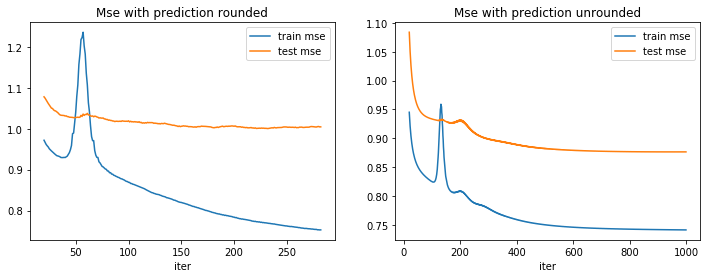

In [42]:
def plot(xy, start_it, title):
    n_iters = xy.shape[0]
    plt.plot(range(start_it,n_iters), xy[start_it:,0],label='train mse')
    plt.plot(range(start_it,n_iters), xy[start_it:,1],label='test mse')
    plt.title(title)
    plt.legend()
    plt.xlabel('iter')
plt.figure(figsize=(12,4))
plt.subplot(121)
plot(rounded_prediction_mse, 20, 'Mse with prediction rounded')
plt.subplot(122)
plot(mse, 20, 'Mse with prediction unrounded')
plt.show()